<a href="https://colab.research.google.com/github/Remato/capacitor-paralelo-FEM/blob/main/relatorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problema do projeto
Um capacitor de placas paralelas, de lado L, é mostrado na figura abaixo. A distância **d** entre as placas é preenchida por 2 dielétricos, de permissividades:

$\epsilon_1$ entre $0 < z < d_1$ 

$\epsilon_2$ entre $d_1 < z < d = (d_1 + d_2)$.

Asumindo que $L >> d$, pode-se usar a aproximação de que o potencial e o campo elétrico não dependam de **x** e **y** $(∂/∂x = ∂/∂y = 0)$, reduzindo o problema a 1 dimensão. A placa condutora de cima é mantida a um potencial Vo, enquanto a placa condutora de baixo é aterrada. Não há cargas livres no interior dos dielétricos.

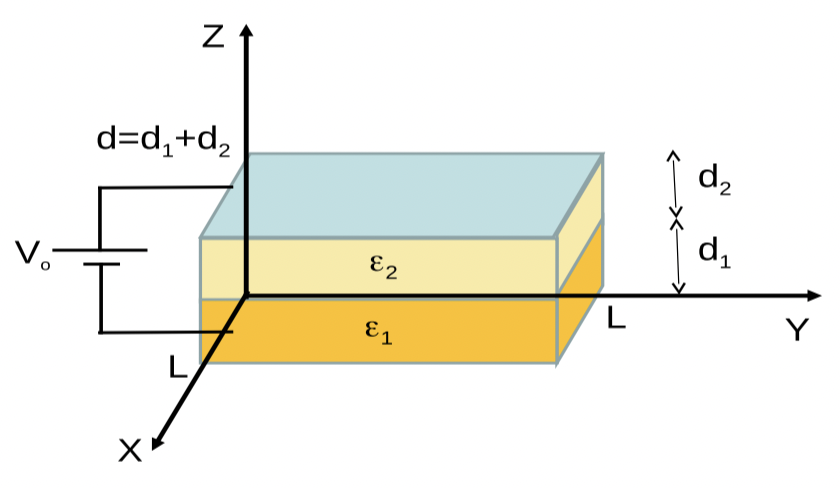

# Trabalho

Aplique o método dos elementos finitos para determinar o potencial em um ponto qualquer entre as placas
$(0 < z < d)$, e a sua capacitância.

### Etapa 1

Iremos segmentar o nosso domínio em N partes, tal que quando N tende a infinito nossa aproximação será a melhor possível.

E onde esses segmentos, cada um estará mais próximo do dielétrico A ou B, dessa forma teremos uma função para dizer qual dielétrico estará exercendo força sob aquele determinado segmento.

##### **Função getEpsilon(n, s, d1, d2)**
###### --------[ PARÂMETROS ]--------
######  **n**  = número de nós de divisão
######  **s**  = número de segmentos,
######  **d1** = tamanho do dielétrico 1 (em metros)
######  **d2** = tamanho do dielétrico 2 (em metros)
###### ---------------------------------------------
A função **getEpsilon** funciona de forma que ele consiga detectar o dielétrico que estará exercendo a força no determinado segmento

No momento da criação da matriz correspondente aos sistemas lineares dos valores de tensão esta função será utilizada para retornar o valor correto do dielétrico

In [ ]:
# Epsilon correspondente ao segmento em que estamos calculando
def getEpsilon(n, s, d1, d2):
    if s * ((d1+d2) / n) < d1:
        return er1
    else:
        return er2

Desta forma nós conseguimos dividir o domínio de 1D em segmentos menores, tal que $x_1, x_2, ..., x_n$ serão nossos segmentos. Para o nosso caso em particular teremos uma reta que irá passar abaixo das 2 placas dielétricas do capacitor e cada um desses segmentos estarão mais próximos de placa A ou B. Esse é o principal motivo da função acima.
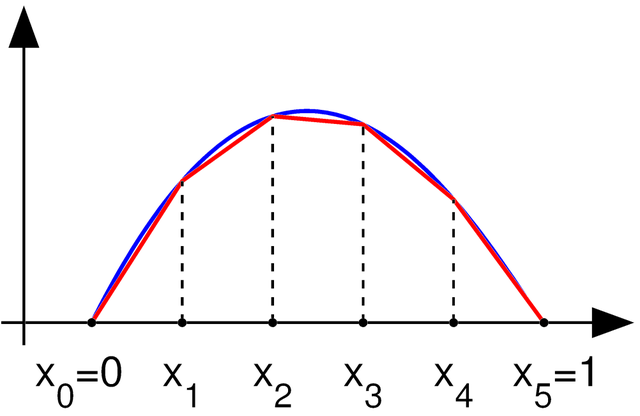

### Etapa 2
Agora precisamos fazer uma aproximação. Para isso precisamos partir dos seguintes dados que temos:

1. Nossa função é basicamente uma reta, pois estamos no mundo 1D sob as placas do capacitor, então nossa função será dada linearmente por $V_e(x) = ax + b$

2. Como temos N segmentos teremos $V^e(x_e) = V_e$ e também $V^e(x_{e+1}) = V_{e+1}$ E assim teremos o $V_0, V_1, ... V_n$ tensões correspondentes aos nossos segmentos descritas por: $N^e_1(x) = \frac{x_{e+1} - x}{L}$, $N^e_2(x) = \frac{x - x_e}{L}$

3. Por fim temos de forma aproximada $V^e(x) ≅ V_eN^e_1(x) + V_{e+1}N^e_2(x)$



### Etapa 3
Agora como temos a permissividade relativa bem definida para cada segmento que nos dividimos, por fim não iremos mais precisar separar a integral da equação diferencial:

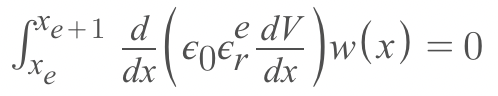

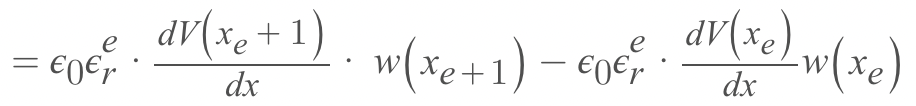



### Etapa 4

Agora podemos substituir as funções que encontramos na Etapa 2 $N^e_1(x)$ e $N^e_2(x)$ e substituir as expressões, obtemos então:

$-V_e\frac{ε_0ε^e_r}{L} + V_{e+1}\frac{ε_0ε^e_r}{L} = -ε_0ε^e_r\frac{dV(x_e)}{dx}$ 

$V_e\frac{ε_0ε^e_r}{L} - V_{e+1}\frac{ε_0ε^e_r}{L} = ε_0ε^e_r\frac{dV(x_{e+1})}{dx}$ 

Nesse caso para cada valor de permissividade nós teremos um sistema linear. E com isso eme mente poderemos montar uma matriz contendo esses sistemas para encontrar suas respectivas soluções.


### Etapa 5

Os sistemas lineares 2x2 por si só não são possíveis de resolver, portanto nós devemos utilizar as condições de contorno para eliminar os demais valores (constantes) para que seja um sistema NxN solucionável.

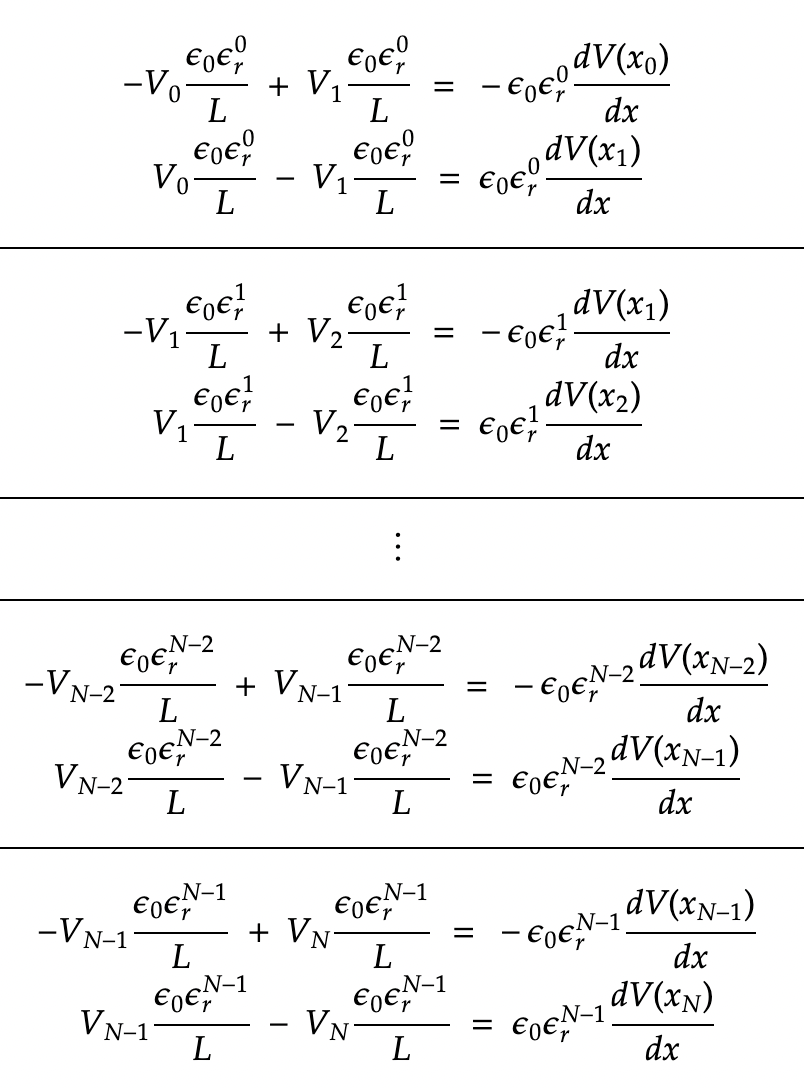

### Etapa 6

Agora nos podemos jogar o sistema 2x2 que encontramos para uma matriz, percebe-se que temos um padrão de quadrantes indo pela diagonal na matriz:

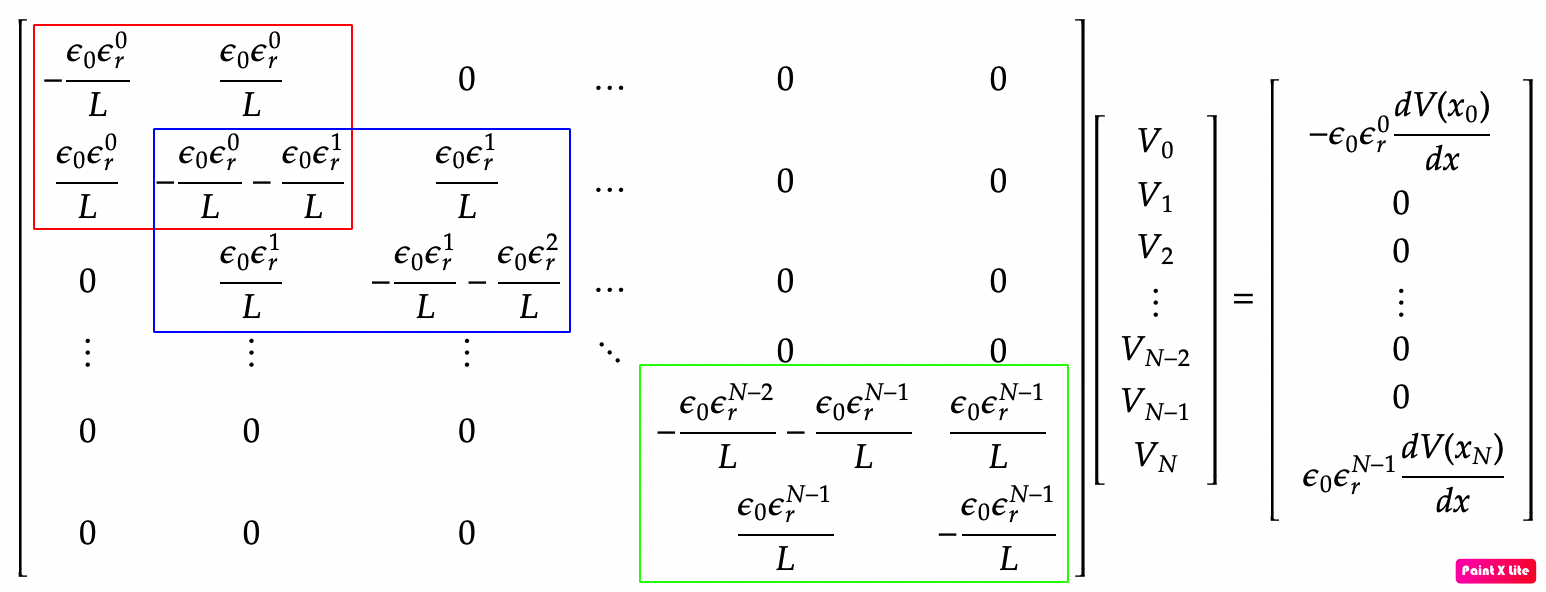


Passando essa formulação para **Python** temos o seguinte trecho de cálculo para nossos sistemas lineares.

In [ ]:
###------------------ MATRIZ DE SISTEMAS LINEARES 2x2 ------------------###
for i in range(n-1):
  if i == 0:
    matrizSL[i][column] = -(e0*getEpsilon(n, i+1, d1, d2))/((d1+d2)/n)
    matrizSL[i][column+1] = (e0*getEpsilon(n, i+1, d1, d2))/((d1+d2)/n)
    matrizSL[i+1][column] = (e0*getEpsilon(n, i+2, d1, d2))/((d1+d2)/n)
    matrizSL[i+1][column+1] = -(e0*getEpsilon(n, i, d1, d2))/((d1+d2)/n) - (e0*getEpsilon(n, i+1, d1, d2))/((d1+d2)/n)
  else:
    matrizSL[i][column+1] = (e0*getEpsilon(n, i+1, d1, d2))/((d1+d2)/n)
    matrizSL[i+1][column] = (e0*getEpsilon(n, i+1, d1, d2))/((d1+d2)/n)
    matrizSL[i+1][column+1] = -(e0*getEpsilon(n, i+1, d1, d2))/((d1+d2)/n) - (e0*getEpsilon(n, i+2, d1, d2))/((d1+d2)/n)
  column+=1

Percebe-se que temos 3 possíveis casos

In [ ]:
# Caso 1
-(e0*getEpsilon(n, i+1, d1, d2))/((d1+d2)/n)

# Caso 2
(e0*getEpsilon(n, i+1, d1, d2))/((d1+d2)/n)

# Caso 3
-(e0*getEpsilon(n, i, d1, d2))/((d1+d2)/n) - (e0*getEpsilon(n, i+1, d1, d2))/((d1+d2)/n)

### Etapa 7

Como falamos antes, nós não temos os valores das derivadas no potencial 0 e no potencial $x_n$ pois esses valores são constantes, e como sabemos a derivada de uma constante sempre será 0. Para mitigar isso nós iremos removes as linhas e colunas correspondentes a esses valores. e ficar apenas com o "miolo" da matriz. Da seguinte forma:

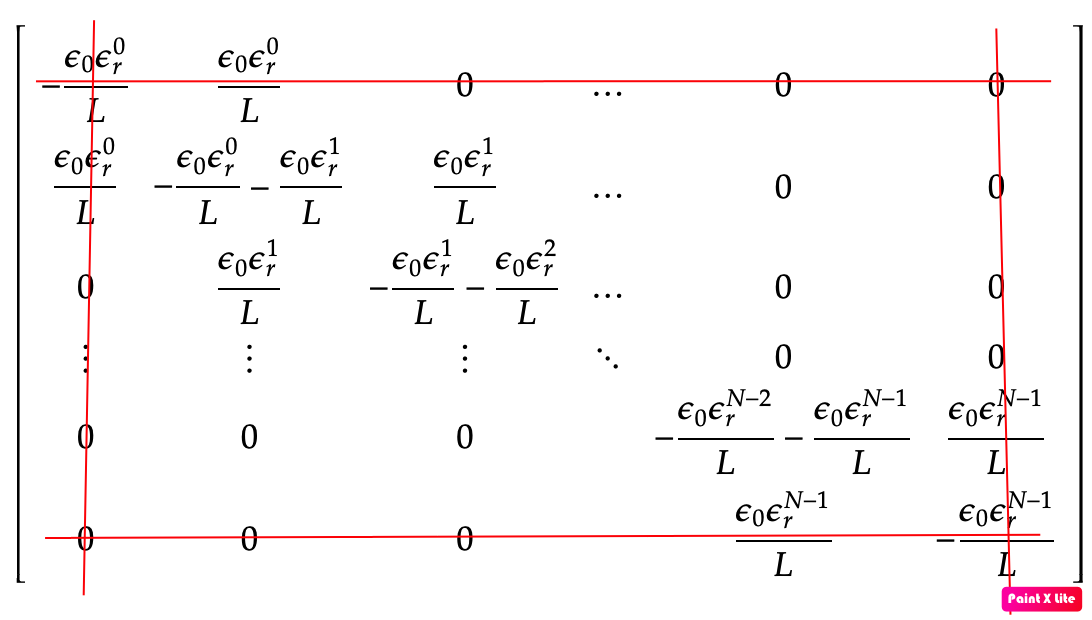


Continuando no código em **Python**

In [ ]:
###------------------ MATRIZ DE SISTEMAS LINEARES 2x2 REDUZIDA ------------------###
for i in range(1, n-1):
  for j in range(1, n-1):
    matrizSLR[i-1][j-1] = matrizSL[i][j]

Continuando nós precisamos criar a matriz de tensões que irá ser multiplicada pela nossa nova matriz reduzida. Tal matriz foi criada apartir do seguinte código em **Python**

In [ ]:
###------------------ SISTEMA LINEAR ------------------###
linearSolved = np.linalg.solve(matrizSLR, matrizResposta)

# adicionando V0 e Vn na matriz de tensoes
matrizTensoes[0][0] = v0
matrizTensoes[n-1][0] = vn

###------------------ MATRIZ DE TENSOES ------------------###
for i in range(n-2):
  matrizTensoes[i+1][0] = linearSolved[i][0]

### Etapa 8 (final)

Agora que temos posse de todos os valores, precisamos apenas aplicar na fórmula de capacitância.

$C = \frac{Q}{V} = ε_0ε_{r2}\frac{A(V_n - V_{n-1})}{V_n - V_0}$

note que o cálculo da capacitâ não possui o valor de $ε_{r1}$ isso se dá pois ele já foi levado e consideração na diagonal da **matrizSLR**

In [ ]:
# Calculo da capacitnacia
C = e0*er2*(L*L*(matrizTensoes[n-1][0] - matrizTensoes[n-2][0]))/(matrizTensoes[n-1][0] - matrizTensoes[0][0])

## Código completo da aplicação

### Para o caso em que 

$L = 2cm$

$N = 5$

$d_1 = d_2 = 1mm$

$ε_{r1} = 2$

$ε_{r2} = 4$

$V_0 = 1 V$

Obteha o sistema linear para um valor de $N = N1 + N2$ específico (você escolhe). Determine a aproximação para o potencial
entre as placas. Plote o resultado.

Plotagem do gráfico de tensões
A capacitância é: 2.361116752e-15F


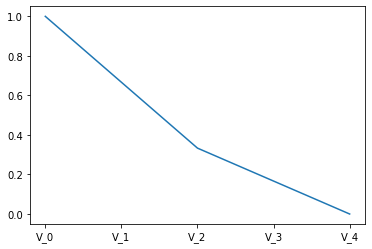

In [ ]:
import numpy as np
import matplotlib.pyplot as mp

###------------------ VARIAVEIS ------------------###
column = 0

L = 0.02
d1 = 0.001
d2 = 0.001
n = 5
v0 = 1
vn = 0

e0 = 8.85418782 * 10**(-12)
er1 = 2
er2 = 4

# Epsilon correspondente ao segmento em que estamos calculando
def getEpsilon(n, s, d1, d2):
    if s * ((d1+d2) / n) < d1:
        return er1
    else:
        return er2

###------------------ MATRIZZES ------------------###
matrizSL = np.zeros(shape = (n, n))
matrizSLR = np.zeros(shape = (n-2, n-2))

matrizResposta = np.zeros(shape = (n-2, 1))
matrizTensoes = np.zeros(shape = (n, 1))

minemonicosTensoes = []

###------------------ MATRIZ DE SISTEMAS LINEAR 2x2 ------------------###
for i in range(n-1):
  if i == 0:
    matrizSL[i][column] = -(e0*getEpsilon(n, i+1, d1, d2))/((d1+d2)/n)
    matrizSL[i][column+1] = (e0*getEpsilon(n, i+1, d1, d2))/((d1+d2)/n)
    matrizSL[i+1][column] = (e0*getEpsilon(n, i+2, d1, d2))/((d1+d2)/n)
    matrizSL[i+1][column+1] = -(e0*getEpsilon(n, i, d1, d2))/((d1+d2)/n) - (e0*getEpsilon(n, i+1, d1, d2))/((d1+d2)/n)
  else:
    matrizSL[i][column+1] = (e0*getEpsilon(n, i+1, d1, d2))/((d1+d2)/n)
    matrizSL[i+1][column] = (e0*getEpsilon(n, i+1, d1, d2))/((d1+d2)/n)
    matrizSL[i+1][column+1] = -(e0*getEpsilon(n, i+1, d1, d2))/((d1+d2)/n) - (e0*getEpsilon(n, i+2, d1, d2))/((d1+d2)/n)
  column+=1


###------------------ MATRIZ DE SISTEMA LINEAR 2x2 REDUZIDA ------------------###
for i in range(1, n-1):
  for j in range(1, n-1):
    matrizSLR[i-1][j-1] = matrizSL[i][j]


###------------------ MATRIZ DE TENSOES ------------------###
matrizResposta[0][0] = -((e0*getEpsilon(n, 1, d1, d2))/((d1+d2)/n) * v0)
matrizResposta[n-3][0] =  -((e0*getEpsilon(n, n-1, d1, d2))/((d1+d2)/n) * vn)



###------------------ SISTEMA LINEAR ------------------###
linearSolved = np.linalg.solve(matrizSLR, matrizResposta)

# adicionando valores de V0 e Vn
matrizTensoes[0][0] = v0
matrizTensoes[n-1][0] = vn

###------------------ MATRIZ DE TENSOES ------------------###
for i in range(n-2):
  matrizTensoes[i+1][0] = linearSolved[i][0]

###------------------ MINEMONICOS DE TENSOES ------------------###
for i in range(n):
  minemonicosTensoes.append('V_'+str(i))


###------------------ PLOT GRAFICO DAS TENSOES ------------------###
print('Plotagem do gráfico de tensões')
mp.plot(minemonicosTensoes, matrizTensoes)

###------------------ CALCULO DA CAPACITANCIA ------------------###
C = e0*er2*(L*L*(matrizTensoes[n-1][0] - matrizTensoes[n-2][0]))/(matrizTensoes[n-1][0] - matrizTensoes[0][0])

print('A capacitância é: ' + str(C) + 'F')

### Para o caso N = 10 

Obteha o sistema linear para um valor de $N = N1 + N2$ específico (você escolhe). Determine a aproximação para o potencial entre as placas. Plote o resultado.

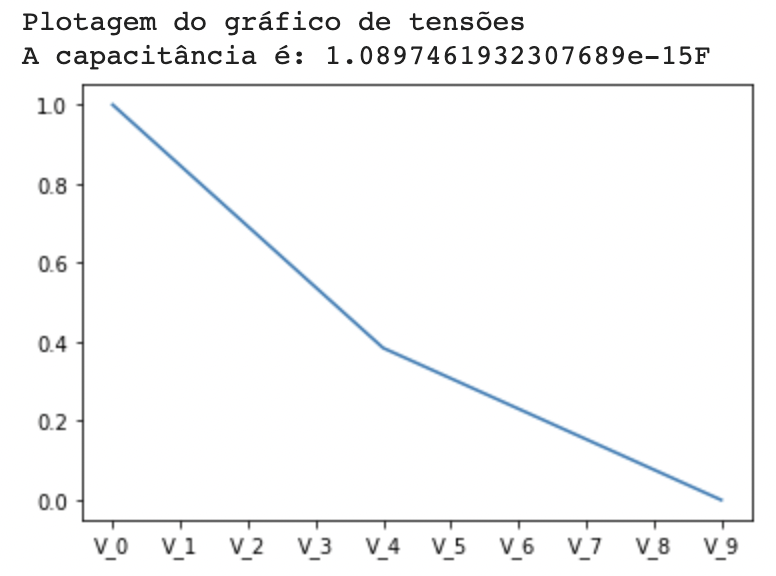


### Para o caso N = 15

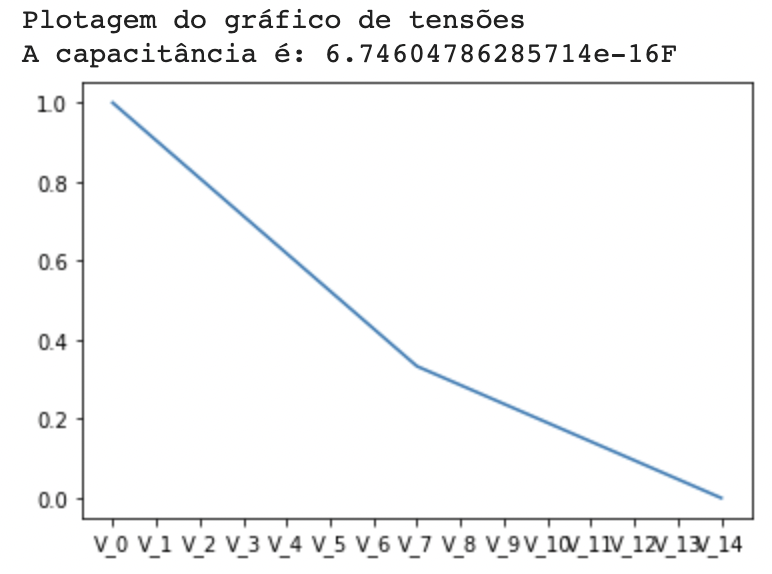

## Conclusão

Podemos perceber que ao aumentar o número de segmentos na nossa aplicação a nossa função linear terá mais pontos com valores e teremos uma maior precisão no cálculo da capacitância. Também podemos observar a aparição de 2 retas e o ponto do meio representa a troca dos dielétricos. 

Por exemplo quando chegamos em V_7 no exemplo acima, nós estamos no limiar do dielétrico 1, e passando para segmentos que se encontram abaixo apenas do dielétrico 2. Gerando assim um redirecionamento no gráfico dado pela segunda reta.